In [1]:
%matplotlib notebook
import ipywidgets as widgets
from traitlets import Unicode, validate
import pandas as pd
import matplotlib.pyplot as plt

class HelloWidget(widgets.DOMWidget):
    _view_name = Unicode('HelloView').tag(sync=True)
    _view_module = Unicode('hello').tag(sync=True)
    _view_module_version = Unicode('0.1.0').tag(sync=True)
    value = Unicode('Hello world!').tag(sync=True)

In [2]:
%%javascript
require.config({
    paths: {
        d3: 'https://d3js.org/d3.v4.min'
    }
});

<IPython.core.display.Javascript object>

In [3]:
%%javascript

define('hello', ["@jupyter-widgets/base", "d3"], function(widgets, d3) {

    var HelloView = widgets.DOMWidgetView.extend({

        render: function() {
            this.value_changed();
            this.model.on('change:value', this.value_changed, this);
        },

        value_changed: function() {
            this.el.textContent = this.model.get('value');
        },
    });

    return {
        HelloView : HelloView
    };
});

<IPython.core.display.Javascript object>

In [4]:
player_name = "Alexis Sanchez"
playersData = pd.read_csv(open("player_data.csv"))
def filter_data(name, attr):
    filterByName = playersData[playersData["player_name"]==name]
    returnData = filterByName[["player_name", attr, "year"]]
    return returnData
players_data = filter_data(player_name, "overall_rating")

HelloWidget()

Dropdown(description='Marks', options=('Alexis Sanchez', 'Andres Iniesta', 'Angel Di Maria', 'Arjen Robben'), value='Alexis Sanchez')

<IPython.core.display.Javascript object>


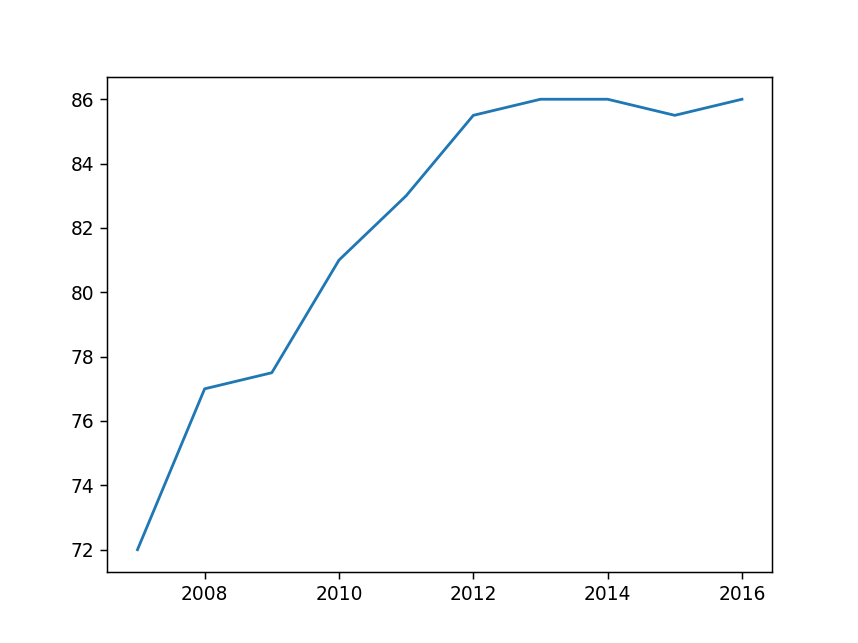

In [11]:
w = HelloWidget()
display(w)
names = ['Alexis Sanchez', 'Andres Iniesta', 'Angel Di Maria', 'Arjen Robben']
def update(name):
    w.value = name['new']
    players_data = filter_data(name['new'], "overall_rating")
    ax.clear()
    ax.plot(players_data['year'],players_data['overall_rating'])
    fig.canvas.draw()
def createDropdown(names):
    mark_choose = widgets.Dropdown(options=names, description='Marks')
    mark_choose.observe(update, names='value')
    display(mark_choose)
createDropdown(names)
map1 = {'new': names[0]}
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()
update(map1)